<a href="https://colab.research.google.com/github/leshawriter/SkillBox/blob/dev/neuralNetworks/homeTask_3/keras_homework_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Домашнее задание
  
В этом домашнем задании вам предстоит обучить модель классификации рукописных цифр на Tensorflow.

Важным дополнительным требованием будет сохранение чекпоинтов на ваш гугл диск (не переживайтеЖ ниже будут подсказки, как это сделать). Это пригодится вам в дальнейшем при обучении более сложных моделей, на случай потери данных при неожиданном отключении Colab.

In [ ]:
#импорт библиотек
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow import keras
print(tf.__version__)
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


 #tf.enable_eager_execution()

2.15.0


####Вспомогательный код

In [ ]:
#@title
#вспомогательные функции
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)
    plt.plot(history["accuracy"],label='train accuracy')
    plt.plot(history["val_accuracy"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Загрузка данных

11490434/11490434 [==============================] - 0s 0us/step


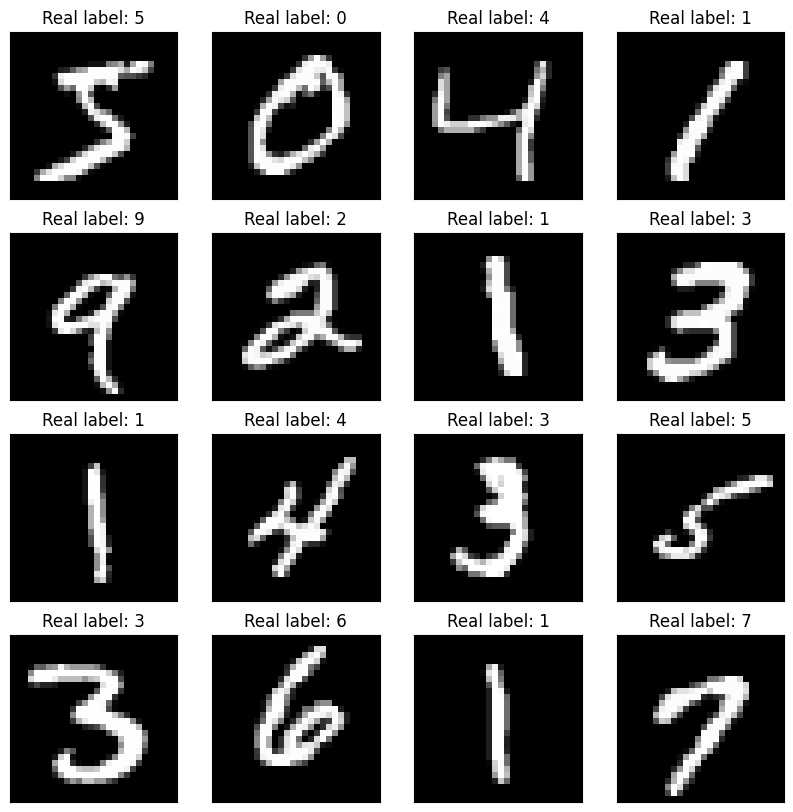

In [ ]:
#загрузим данные
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
x_train = x_train.reshape((-1, 28*28)) # вытянули каждую картинку в вектор
x_test = x_test.reshape((-1, 28*28))


In [ ]:
#посмотрим размерность наборов
x_train.shape

(60000, 784)

In [ ]:
# прикрепим ваш гугл диск к виртуальной машине
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Путь до вашего гугл диска скорее всего выглядит так: /content/drive/My Drive/
# если эта клетка вызывает ошибку,
# измените путь согласно ! ls "/content/drive/"

path = Path("/content/drive/My Drive/Skillbox/model_1")
path.mkdir(exist_ok=True, parents=True) # папка создается на вашем гугл диске. вместе с "родителями"
assert path.exists()
cpt_filename = "best_checkpoint.hdf5"
cpt_path =str(path / cpt_filename)
# После выполнения этой клетки, в вашем гугл диске должна создаться папка: Skillbox/model_1
# убедитесь в этом

А весь код ниже вы реализуете самостоятельно! Вы уже к этому готовы :)
Требования к модели:
1. Точность на тестовой части выборки >96%
2. Чекпоинт модели с лучшими параметрами должен быть сохранен у вас на гугл диске
3. Объект history, который получается из model.fit(...) должен содержать значения лосса и accuracy для трейна и теста

In [ ]:
#инициируем создание модели нейронной сети
model = keras.models.Sequential()

In [ ]:
#добавляем слоим
model.add(keras.layers.Flatten(input_shape=[784,])) # взял размерность 784 входящего слоя , так как размерность набора данных 60000x784 где 784 число фичей, а 60000 число items
model.add(keras.layers.Dense(300, activation="relu")) #первый слой с функцией активации relu
model.add(keras.layers.Dense(100, activation="relu")) #второй слой с функцией активации relu
model.add(keras.layers.Dense(10, activation="softmax")) #третий слой с функцией активации softmax

In [ ]:
#посмотрим модель
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


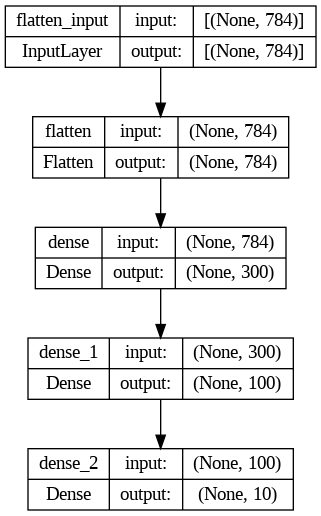

In [ ]:
#изобразим модель
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#компилируем построенную модель
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
#создадим чекпоинт с условием сохранения
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
#обучим скомпилированную модель
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=0, callbacks=[checkpoint])



Epoch 1: val_loss improved from inf to 0.29655, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.29655 to 0.22981, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5

Epoch 3: val_loss improved from 0.22981 to 0.19991, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5

Epoch 4: val_loss improved from 0.19991 to 0.17512, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5

Epoch 5: val_loss improved from 0.17512 to 0.15585, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5

Epoch 6: val_loss improved from 0.15585 to 0.14275, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5

Epoch 7: val_loss improved from 0.14275 to 0.13013, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5

Epoch 8: val_loss improved from 0.13013 to 0.11929, saving model to /content/drive/My Drive/Skillbox/model_1/best_checkpoint.hdf5

Epoch 9: val_loss improved from 0.11929 to 0.11282, saving model to /content/drive

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "accuracy" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "val_accuracy" in history.history, "Please, provide validation_data in model.fit."
assert np.max(history.history["val_accuracy"]) > 0.95, "Validation accuracy must be more than 0.95"
# Для старой версии (tf.__version__ == 1.x) запустить aseert-ы ниже:
# assert "acc" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
# assert "val_acc" in history.history, "Please, provide validation_data in model.fit."
# assert np.max(history.history["val_acc"]) > 0.95, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed


Давайте посмотрим на графики обучения:

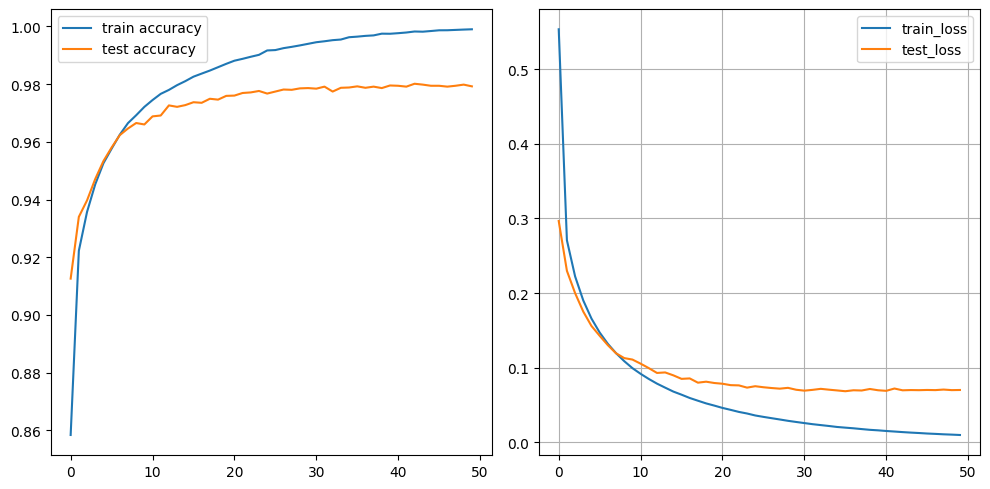

In [ ]:
show_progress(history.history)

А теперь перейдем к загрузке модели. Если все реализовано правильно, то код ниже должен сработать без ошибок:

In [ ]:
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc = restored_model.evaluate(x_test, y_test)
print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.96

313/313 [==============================] - 1s 3ms/step - loss: 0.0684 - accuracy: 0.9792
Accuracy of restored model 97.92%


И, наконец, можно сравнить предсказания с реальными классами (с такой точностью найти ошибку будет сложно):

313/313 [==============================] - 1s 3ms/step


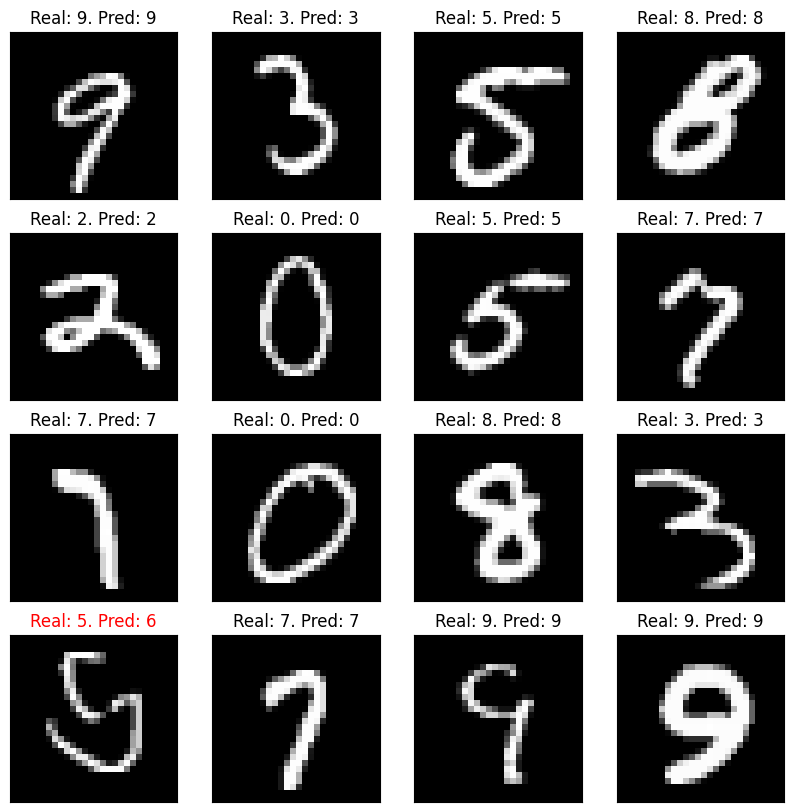

In [ ]:
predicted_labels = restored_model.predict(x_test)
classes = np.argmax(predicted_labels, axis=1)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], classes[idxs])